In [ ]:
Assesment For Neural Network Regression using TensorFlow
1. Create your own regression dataset(or make the one we created n "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural netwaork with 4 dense Layers and fitting it to your own regression dataset, how does it problem?
3. Try and improve the result
4. Create the plot between predict and actual values
Please do not use exact same example as Regression Example 3
Upload your Gogle Colab to Git Hub

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
rng=np.random.RandomState(42)
n=600
X=pd.DataFrame(
    {
        "Working_Hours":rng.normal(40,5,n).clip(20,60),
        "Experience_Years":rng.randint(0,31,n),
        "Education_level":rng.randint(1,6,n)
    })
noise=rng.normal(0,3000,n)

y= 2000+200*X["Working_Hours"]+1500*X["Experience_Years"]+3000*X["Education_level"]+noise

#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scalar=StandardScaler()
#transform using
X_train_tr=scalar.fit_transform(X_train)
X_test_tr=scalar.transform(X_test)
print(X_train)
print(X_train_tr)

     Working_Hours  Experience_Years  Education_level
145      43.909114                 0                1
9        42.712800                 3                5
375      36.163262                14                1
523      42.852993                12                1
188      35.766031                13                3
..             ...               ...              ...
71       47.690183                 3                4
106      49.430930                16                3
270      47.206366                 1                2
435      40.370474                14                1
102      38.286427                17                3

[480 rows x 3 columns]
[[ 0.83878454 -1.67818704 -1.40840731]
 [ 0.59354074 -1.3414271   1.43207802]
 [-0.74911128 -0.10664065 -1.40840731]
 ...
 [ 1.51471957 -1.56593373 -0.69828598]
 [ 0.11336502 -0.10664065 -1.40840731]
 [-0.31386347  0.23011929  0.01183536]]


In [6]:
#model creation
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_tr.shape[1],)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(1)
])

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.mse,
              metrics=["mae"]
              )

In [8]:
history=model.fit(X_train_tr,y_train,epochs=100,validation_data=(X_test_tr,y_test),batch_size=32)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1899733120.0000 - mae: 41183.9180 - val_loss: 2147503104.0000 - val_mae: 44449.3164
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1899607424.0000 - mae: 41182.3125 - val_loss: 2147187584.0000 - val_mae: 44445.7070
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1899197312.0000 - mae: 41177.1211 - val_loss: 2146159872.0000 - val_mae: 44434.0156
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1897911168.0000 - mae: 41161.0117 - val_loss: 2143239936.0000 - val_mae: 44401.0977
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1894424832.0000 - mae: 41117.9805 - val_loss: 2135883008.0000 - val_mae: 44319.0117
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1885940096.0000 - mae: 41014.7227 - val_loss: 2119136640.0000 - val_mae: 44133.6172
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1867268352.0000 - mae: 40789.9570 - val_loss: 2084562304.0000 - val_mae: 43752.246

In [9]:
loss,mae=model.evaluate(X_test,y_test,verbose=0)
print(f"MAE:{mae}")

MAE:390113.28125


In [10]:
y_pred=model.predict(X_test_tr)
# print(y_pred.flatten())
print(y_test.values)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[61405.78920265 61036.21032413 43082.45093084 56877.0209106
 58922.67319444 39283.46367821 25278.07797997 51221.20785301
 50509.35280569 53131.62038279 31230.87581528 55027.68410464
 35937.04578936 37767.57273676 37931.3046003  52692.5106947
 37341.44386994 22196.2347264  29008.24122969 32176.96133032
 32295.86310545 17080.17313335 35312.45207611 31569.54118368
 54186.18355459 55374.0463838  56683.16422881 46317.14093612
 37719.80144343 59415.47155228 55366.730852   37323.42339705
 47266.11103003 30316.52209497 58480.03383632 59954.32297986
 42871.69602139 21632.93213468 39572.57111532 49693.66759101
 28255.21135498 57152.37343392 26491.62850875 57088.32116937
 37129.37058835 44664.07952491 34566.1301314  13774.97586241
 37692.03413058 40129.47888237 54245.37020833 53649.04875627
 35378.13701708 63285.53017494 27843.46969947 53045.82231052
 50991.50925461 35819.96393547 51057.66821214 39155.44589269
 67839.50934635 49867.67156959 44413.33442735 378

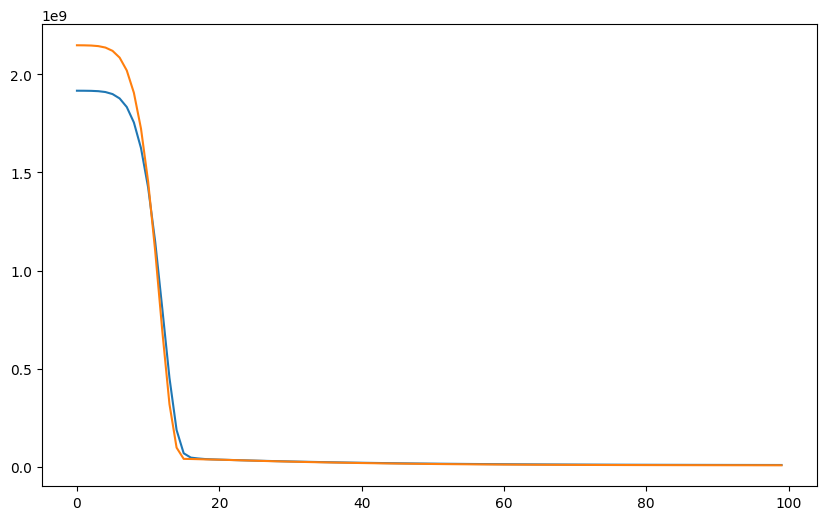

In [12]:
plt.figure(figsize=(10,6))
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")

In [13]:
print(y_test.shape)
print(y_pred.shape)

(120,)
(120, 1)


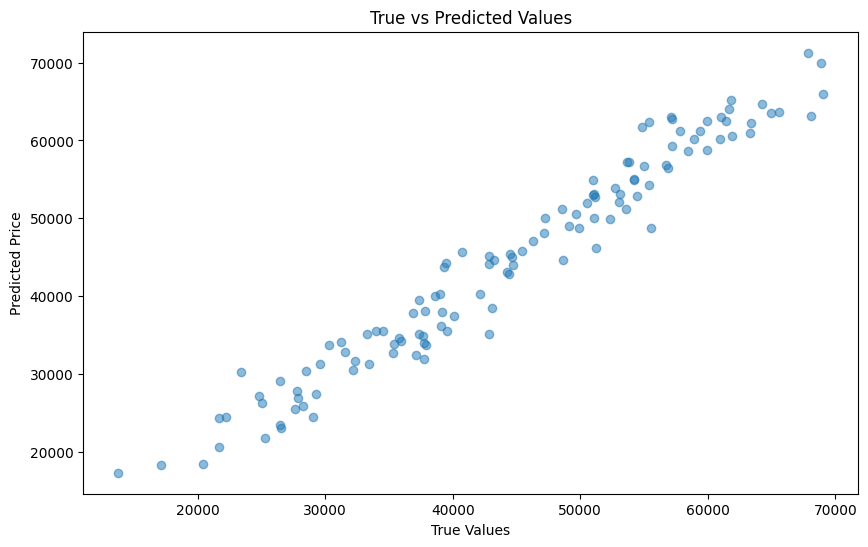

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Price")
plt.title("True vs Predicted Values")
plt.show()